In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from VibTesting import VibTesting

### Measurement

In [4]:
sensor_list = ['34788', # force
               '4009', # 1
               'LW355978', # 2
               '371918', # 3
               '177270', # 4
               '371919', # 5
               '371917', # 6
               'LW184270', # 7
               '359598'] # 8 """

In [13]:
# Impact testing instance
setup_file_loc = b"C:\Users\timvr\OneDrive - Univerza v Ljubljani\Documents\Doktorat\Python_scripts\Impact testing v2\Dewesoft\devesoft_test.dxs"
imp_testing = VibTesting(sensor_list=sensor_list, sensor_xlsx= 'Merilna oprema_updated.xlsx',
                         source='Dewesoft', acquisition_time=1,
                         no_impacts=10, trigger_level=5,
                         imp_force_lim=0.03,
                         DS_force_s_ind=0, DS_setup_file_path=setup_file_loc)

dsconLoadSetup errCode: -2


In [14]:
directions = ['x', 'y', 'z']
points = [f'{i//3 + 1}{directions[i%3]}' for i in range(21)]
#points = [f'{i}_A' for i in points] + [f'{i}_B' for i in points]

In [15]:
points = ['1x_A', '1y_A', '1z_A', '2x_A', '2y_A', '2z_A', '3x_A', '3y_A', '3z_A', '7x_B', '7y_B', '7z_B', '1x_B', '1y_B', '1z_B', '2x_B', '2y_B', '2z_B', '3x_B', '3y_B', '3z_B', '7x_A', '7y_A', '7z_A']


In [16]:
imp_testing.sampling_rate

10000

In [17]:
imp_testing.update_rate

0.2

Measurement point 7y_A


  0%|          | 0/10 [00:00<?, ?it/s]

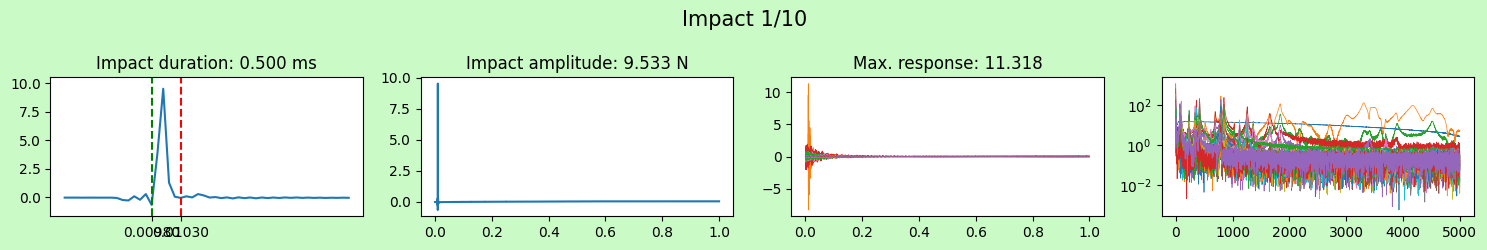

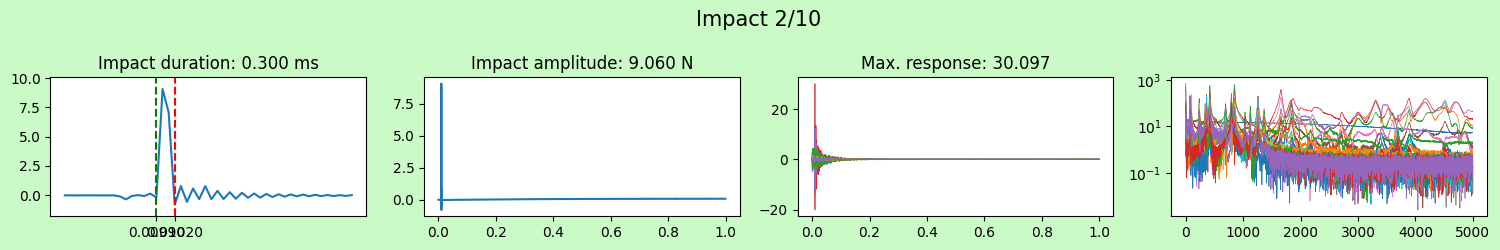

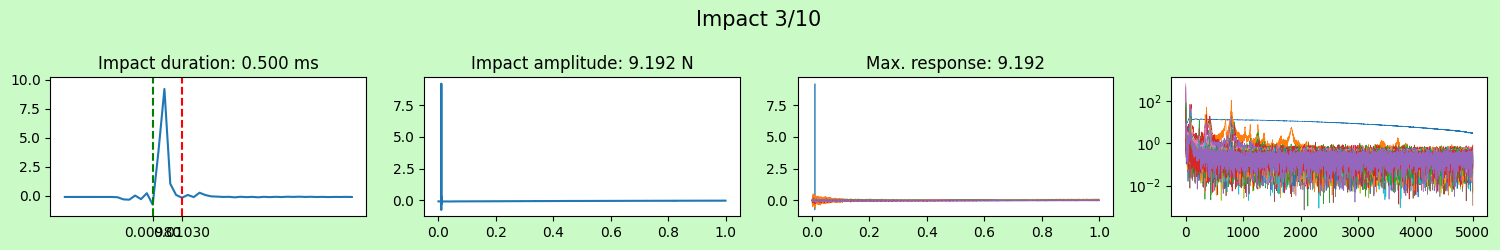

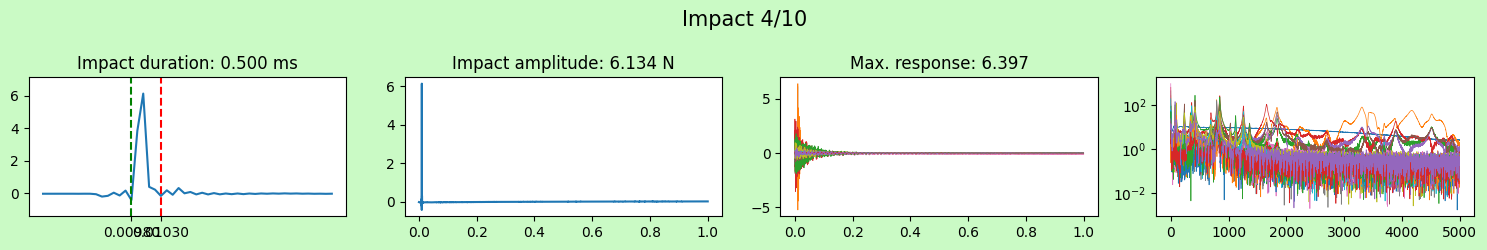

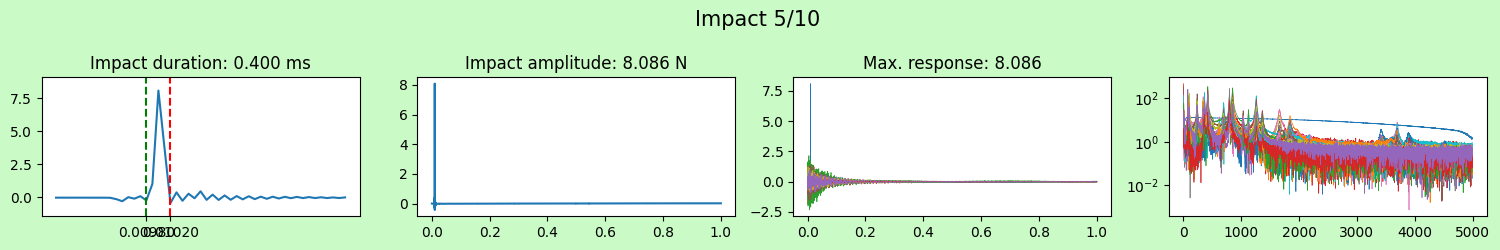

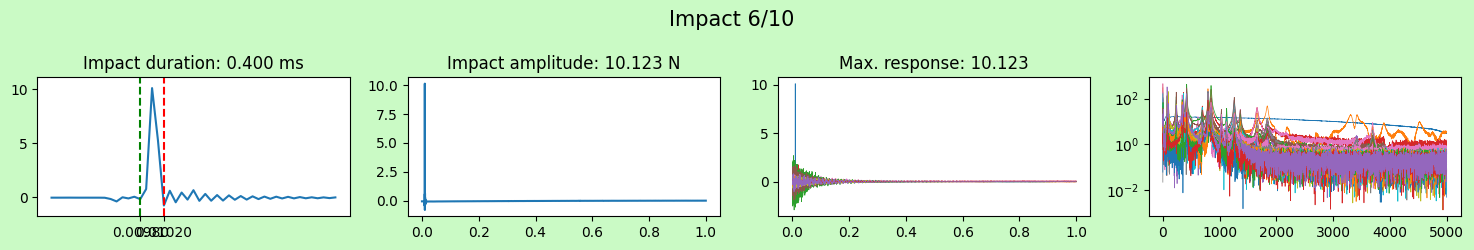

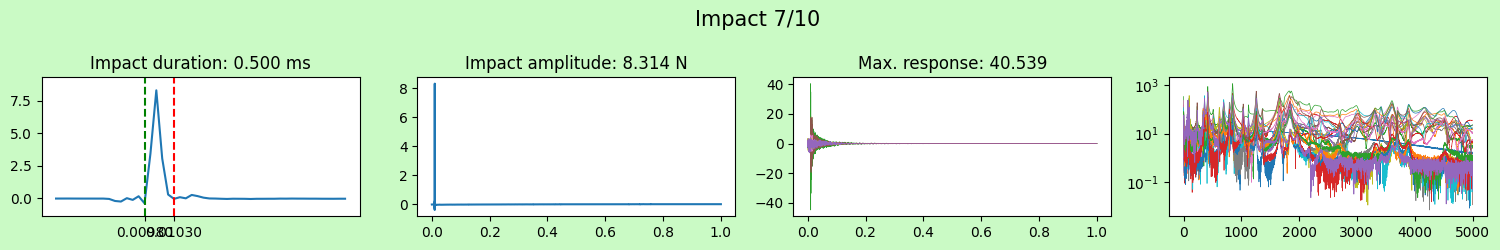

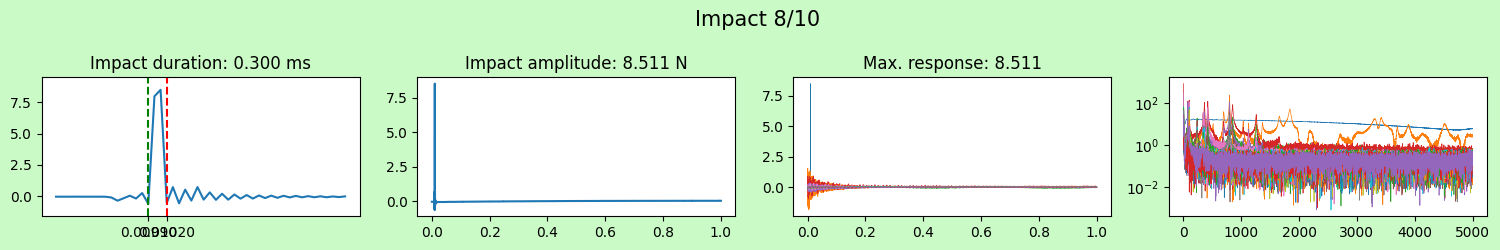

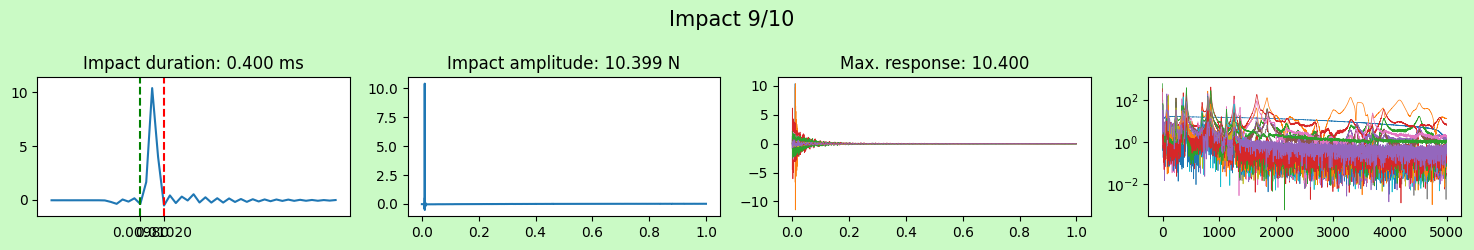

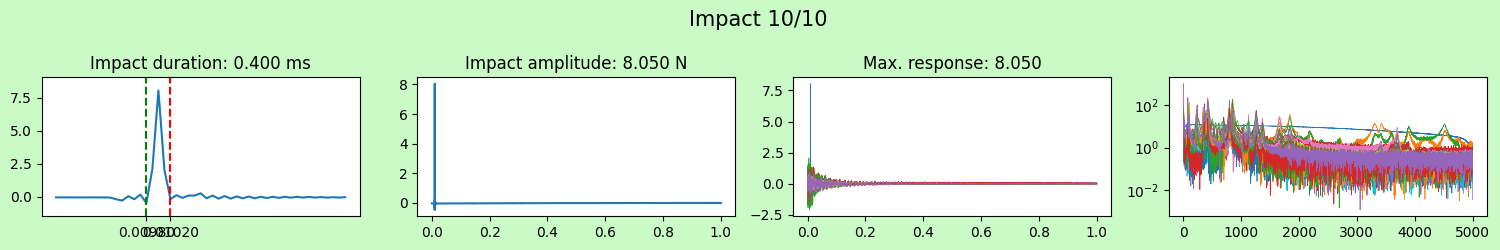

GridspecLayout(children=(SelectMultiple(index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), layout=Layout(grid_area='widget0…

In [21]:
meas_file = r"C:\Users\timvr\OneDrive - Univerza v Ljubljani\Documents\Doktorat\Projekt_2\karakterizacija_kovic\Meritve\Meritve_5\DS_imp_test"
imp_testing.firts_meas = True
imp_testing.start_imp_test_series(list_of_points= points[-2:],
                                  measurement_file=meas_file)

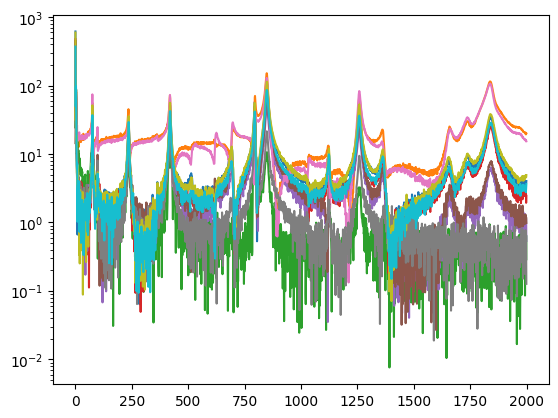

In [22]:
fr_lim = 2000
for i in range(10):
    acc_fft = np.fft.rfft(imp_testing.measurement_array[i, 2,:])[:fr_lim]
    plt.semilogy(abs(acc_fft))

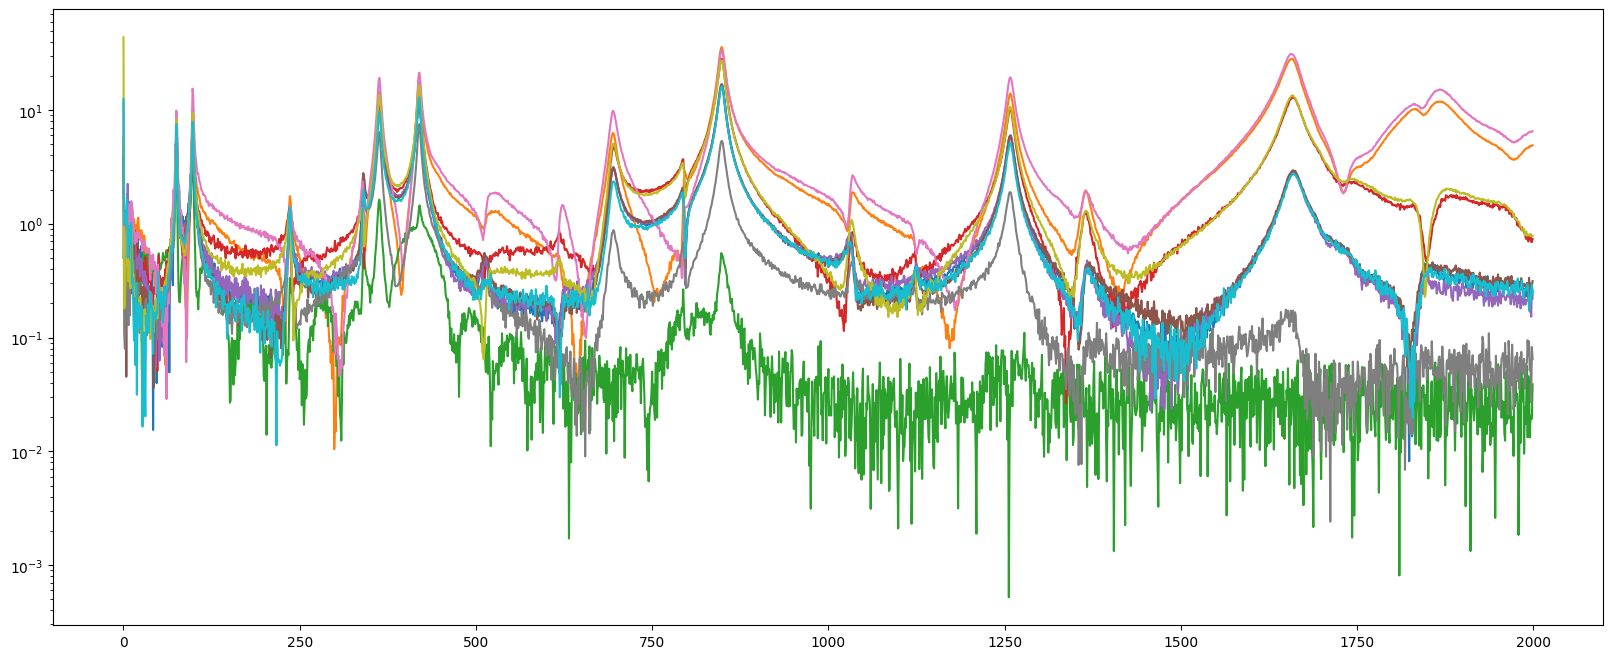

In [23]:
fr_lim = 2000
plt.figure(figsize=(20,8))
for i in range(10):
    acc_fft = np.fft.rfft(imp_testing.measurement_array[i, 3, :])[:fr_lim]
    f_fft = np.fft.rfft(imp_testing.measurement_array[i, 0, :])[:fr_lim]
    plt.semilogy(abs(acc_fft/f_fft))

In [85]:
imp_testing.force_chn_ind

In [82]:
imp_testing.measurement_array[0, imp_testing.force_chn_ind, :]

array([[[ 0.        ,  0.        ,  0.        , ...,  0.11579166,
          0.11420874,  0.11473638],
        [ 0.        ,  0.        ,  0.        , ..., -0.02707643,
          0.00470513,  0.05290716],
        [ 0.        ,  0.        ,  0.        , ...,  0.33826619,
          0.46420696,  0.55979484],
        [ 0.        ,  0.        ,  0.        , ..., -0.1490863 ,
          0.08378591,  0.30895597]]])

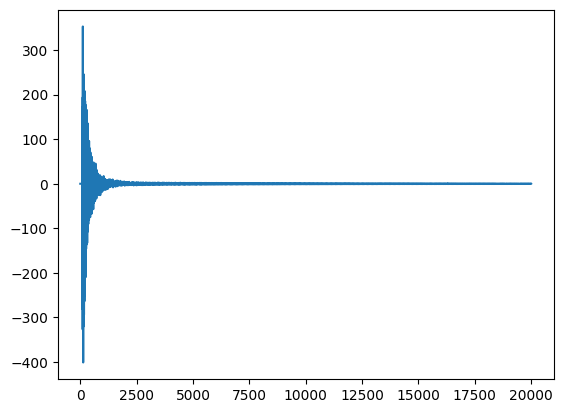

In [79]:
plt.plot(imp_testing.measurement_array[0][1,:])

In [65]:
imp_testing.sensor_data

{'force': {'min': -200, 'max': 200, 'sensitivity': 23.53},
 '1x': {'min': -45, 'max': 45, 'sensitivity': 100.62},
 '1y': {'min': -45, 'max': 45, 'sensitivity': 101.43},
 '1z': {'min': -45, 'max': 45, 'sensitivity': 101.42},
 '2x': {'min': -45, 'max': 45, 'sensitivity': 98.2},
 '2y': {'min': -45, 'max': 45, 'sensitivity': 102.1},
 '2z': {'min': -45, 'max': 45, 'sensitivity': 100.3},
 '3x': {'min': -45, 'max': 45, 'sensitivity': 102.2},
 '3y': {'min': -45, 'max': 45, 'sensitivity': 99.3},
 '3z': {'min': -45, 'max': 45, 'sensitivity': 102.1},
 '4x': {'min': -45, 'max': 45, 'sensitivity': 100.5},
 '4y': {'min': -45, 'max': 45, 'sensitivity': 100.99},
 '4z': {'min': -45, 'max': 45, 'sensitivity': 98.74},
 '5x': {'min': -45, 'max': 45, 'sensitivity': 103.4},
 '5y': {'min': -45, 'max': 45, 'sensitivity': 100.5},
 '5z': {'min': -45, 'max': 45, 'sensitivity': 101.8},
 '6x': {'min': -45, 'max': 45, 'sensitivity': 101.6},
 '6y': {'min': -45, 'max': 45, 'sensitivity': 102.5},
 '6z': {'min': -45, '

In [ ]:
imp_testing.measurement_array.shape

(10, 13, 51200)

In [ ]:
# close the task
imp_testing.close_task()